<a href="https://colab.research.google.com/github/upwind1993/Numerical-Analysis/blob/main/19%EC%9E%A5/19%EC%9E%A5(%EC%88%98%EC%B9%98%EC%A0%81%EB%B6%84_%EA%B3%B5%EC%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **19장 수치적분 공식** <br>
1. 소개 및 배경 <br>
2. Newton-Cotes 공식<br>
3. 사다리꼴 공식 <br>
4. Simpson 공식 <br>
5. 고차 Newton-Cotes 공식 <br>
6. 부등간격의 적분 <br>
7. 개구간법,br>
8. 다중적분


자유낙하하는 번지 점프하는 사람의 속도 <br>
$ z(t) =\int_{0}^{t} v(t)dt = \int_{0}^{t} \sqrt{\frac{gm}{c_d}} tanh (\sqrt{\frac{gc_d}{m}}t)dt$
<br>
g = 9.21 $m/s^2$ <br>
t= 3sec <br>
m = 68.1kg <br>
$C_d$ = 0.25 kg/m

In [23]:
def trap(func,a,b,n=100):
    """
    Composite trapezoidal rule quadrature
    Input:
        func = name of function to be integrated
        a,b = integration limits
        n = number of segments (default = 100)
    Output:
        I = estimate of integral
    """
    if b <= a: return 'upper bound must be greater than lower bound'
    x = a
    h = (b-a)/n
    s = func(a)
    for i in range(n-1):
        x = x + h
        s = s + 2*func(x)
    s = s + func(b)
    I = (b-a)*s/2/n
    return I


In [27]:
import numpy as np

g = 9.81
m = 68.1
# t= 3
cd  = 0.25

zint = lambda t: np.sqrt(m*g/cd)*np.tanh(np.sqrt(g*cd/m)*t)
z = trap(lambda t: np.sqrt(m*g/cd)*np.tanh(np.sqrt(g*cd/m)*t),0.,3, 100)
print(z)

41.94785498810134


19.6 부등간격의 적분 <br>
trapuneq-1

In [29]:
def trapuneq(x,y):
    """
    trapezoidal rule for unequally spaced data
    returns an array of cumulative sums
    Input:
        x = array of independent variable values
        y = array of dependent variable values
        x and y arrays must be of equal length
            and in ascending order of x
    Output:
        s = array of sums
    """
    n = len(x)
    if len(y) != n: return 'x and y arrays must be of equal length'
    for i in range(n-1):
        if x[i+1] < x[i]: return 'x array not in ascending order'
    s = 0
    for k in range(0,n-1):
        s = s + (x[k+1]-x[k])*(y[k+1]+y[k])/2
    return s

In [30]:
import numpy as np
x = np.array([0.,0.12,0.22,0.32,0.36,0.4,0.44,0.54,0.64,0.7,0.8])
y = 0.2 + 25.*x - 200.*x**2 + 675.*x**3 - 900.*x**4 + 400.*x**5
Iest = trapuneq(x,y)
print('Integral estimate = {0:6.4f}'.format(Iest))


Integral estimate = 1.5948


Python NumPy's Built-in Function: trapz

In [32]:
import numpy as np
x = np.array([0.,0.12,0.22,0.32,0.36,0.4,0.44,0.54,0.64,0.7,0.8])
y = 0.2 + 25.*x - 200.*x**2 + 675.*x**3 - 900.*x**4 + 400.*x**5

Iest = np.trapz(y,x)
print('Integral estimate = {0:6.4f}'.format(Iest))

Integral estimate = 1.5948


Python Function for Cumulative Integration – trap_cumulative - 1

In [33]:
def trap_cumulative(x,y):
    """
    trapezoidal rule for unequally spaced data
    returns an array of cumulative sums
    Input:
        x = array of independent variable values
        y = array of dependent variable values
        x and y arrays must be of equal length
            and in ascending order of x
    Output:
        s = array of sums
    """
    n = len(x)
    if len(y) != n: return 'x and y arrays must be of equal length'
    for i in range(n-1):
        if x[i+1] < x[i]: return 'x array not in ascending order'
    s = np.zeros((n))
    for k in range(1,n):
        s[k] = s[k-1] + (x[k]-x[k-1])*(y[k]+y[k-1])/2
    return s

Python Function for Cumulative Integration – trap_cumulative - 3

Text(0.5, 1.0, 'Cumulative Standard Normal Probability')

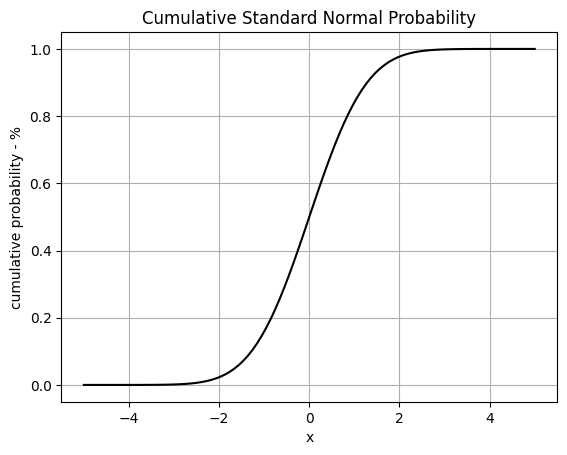

In [35]:
import numpy as np
mu = 0.
sigma = 1.
a = -5.
b = 5.
x = np.linspace(a,b,100)
f = 1/np.sqrt(2*np.pi)/sigma*np.exp(-(x-mu)**2/sigma**2/2)
F = trap_cumulative(x,f)
import pylab
pylab.plot(x,F,c='k')
pylab.grid()
pylab.xlabel('x')
pylab.ylabel('cumulative probability - %')
pylab.title('Cumulative Standard Normal Probability')


다중적분

Python SciPy integrate Functions: dblquad and tplquad

In [36]:
from scipy.integrate import dblquad
def f(y,x):
    return 2*x*y + 2*x - x**2 -2*y**2 + 72.
Iest,Ierr = dblquad(f,0.,8.,lambda x: 0.,lambda x: 6.)
print(Iest)
print(Ierr)


2816.0
3.126388037344441e-11
